In [1]:
from qiskit import *

In [2]:
%matplotlib inline
s='111' #INITIALISE this is the secret number
n = len(s)
from qiskit.tools.visualization import plot_histogram
#setup
circuit = QuantumCircuit(n +1, n)
circuit.h(list(range(n)))
circuit.x(n)
circuit.h(n)
circuit.draw(output='mpl')
circuit.barrier()

In [3]:
#encode the Bernstein-Vazirani function as a quantum oracle
for i in range(n):
    if s[i] == '1':
        circuit.cx(n-i-1,n)
circuit.barrier()

In [4]:
#final Hadamards and mmt
circuit.h(list(range(n)))
circuit.measure(list(range(n)),list(range(n)))

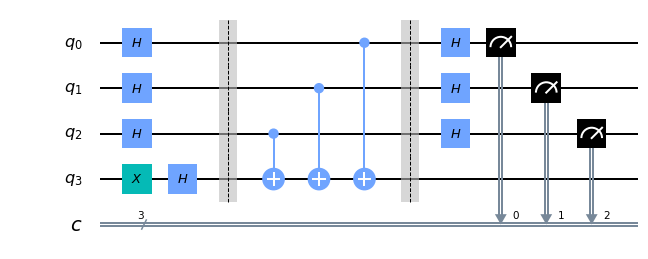

In [5]:
circuit.draw(output='mpl')

In [9]:
#get results on quantum SIMULATOR
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'111': 1}


In [6]:
#get results on QISKIT
#initialise
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
from qiskit.tools.monitor import job_monitor

In [7]:
#get results on QISKIT
#run on IBM
job = execute(circuit, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


In [8]:
result= job.result()
import operator
#print (max(result.get_counts(circuit).items(), key=operator.itemgetter(1))[0]) #MLE
for key in sorted(result.get_counts().keys()):
    print (key + ': ' + str(result.get_counts()[key]))

000: 452
001: 275
010: 88
011: 41
100: 70
101: 58
110: 26
111: 14
